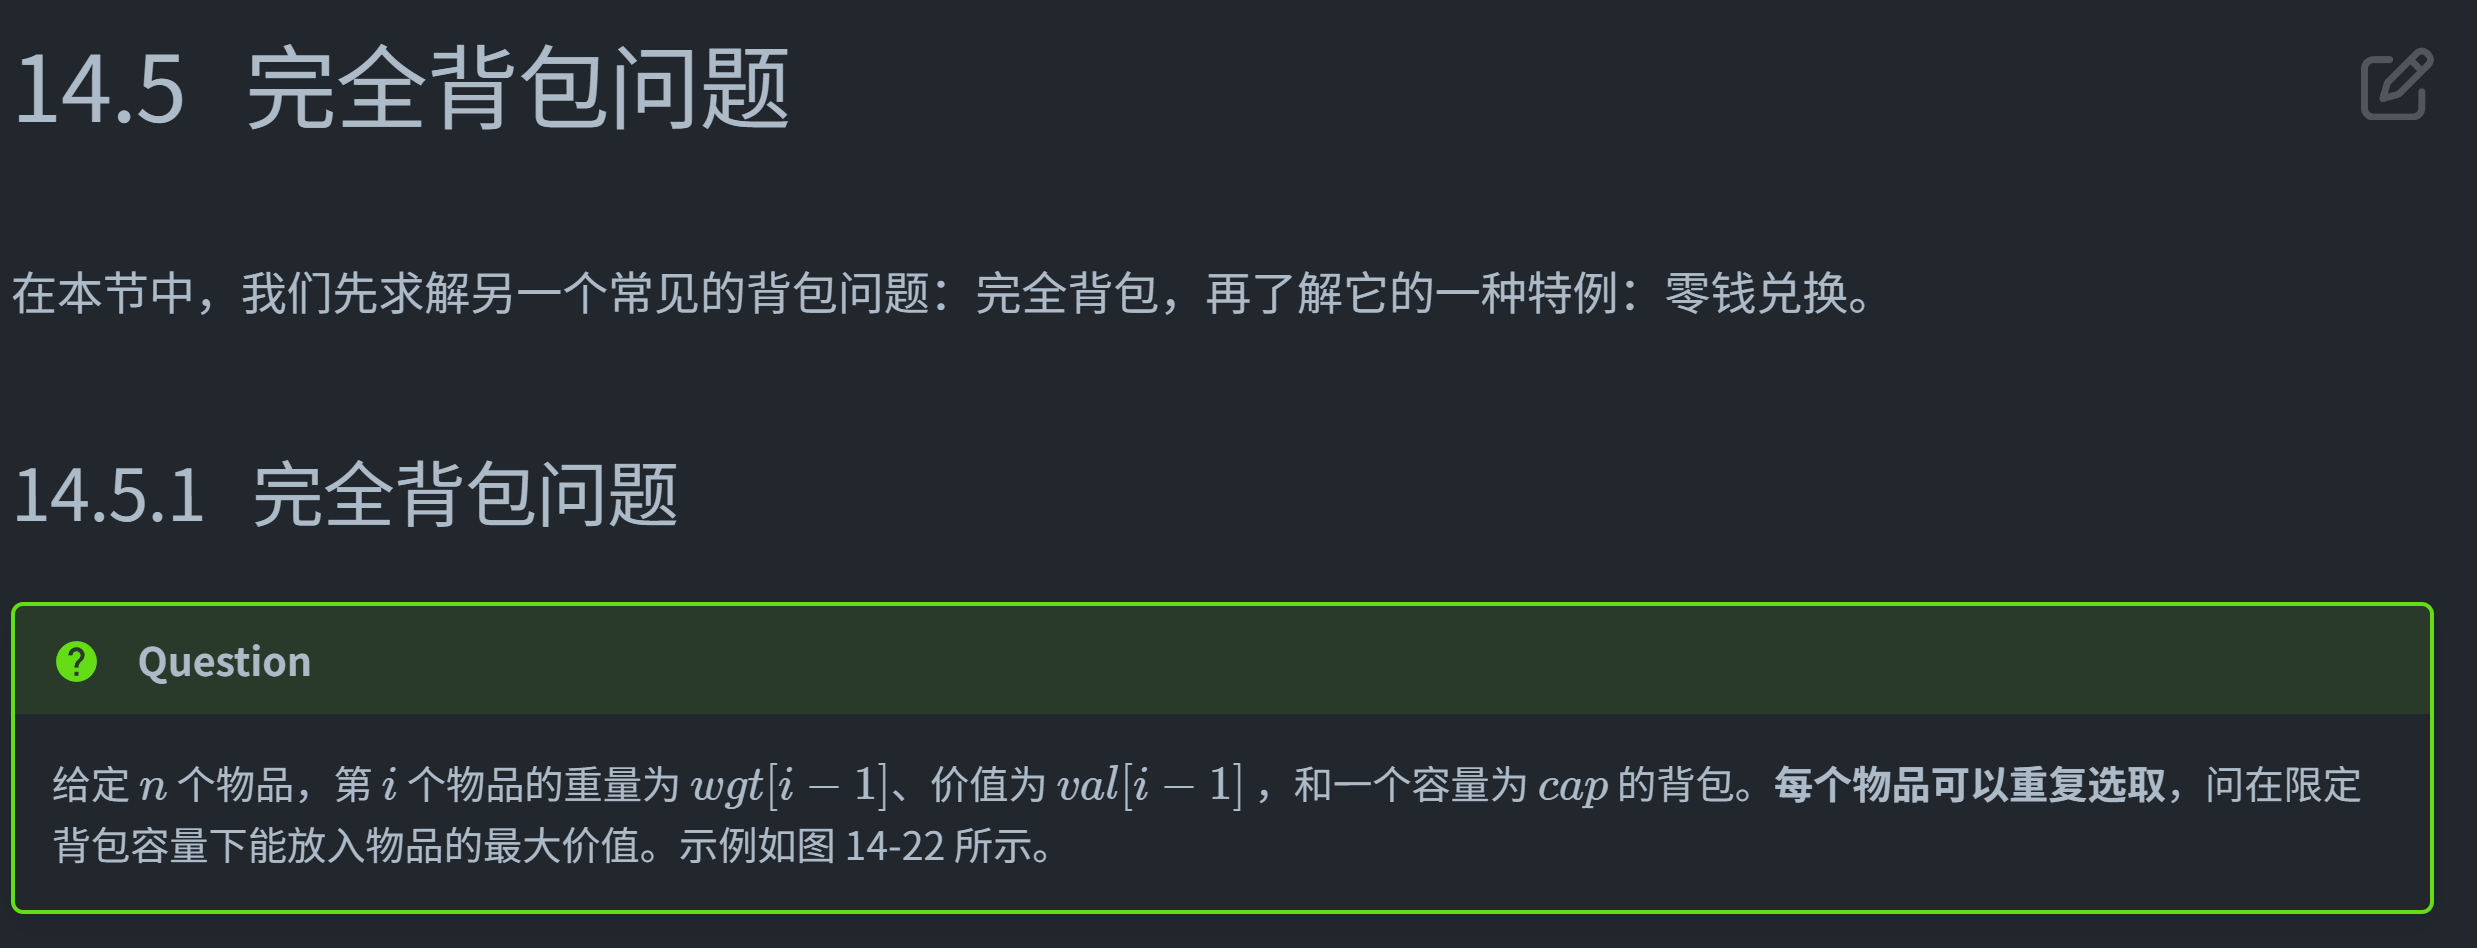
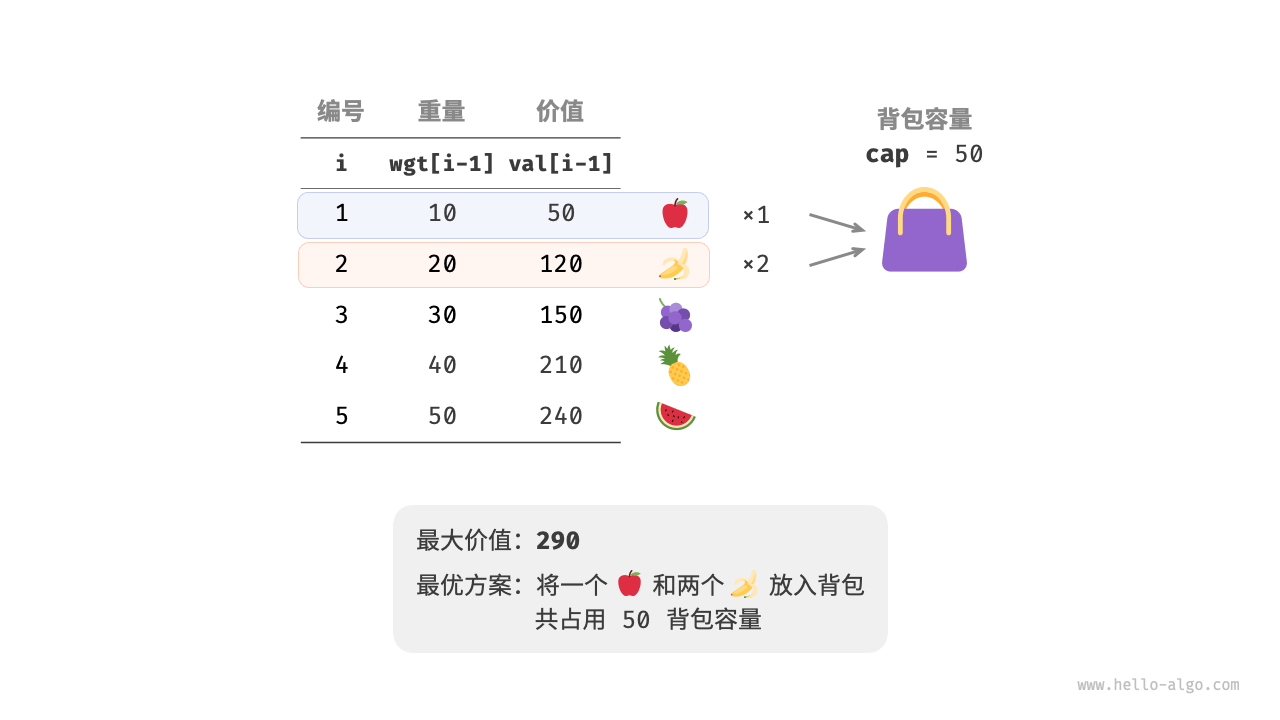
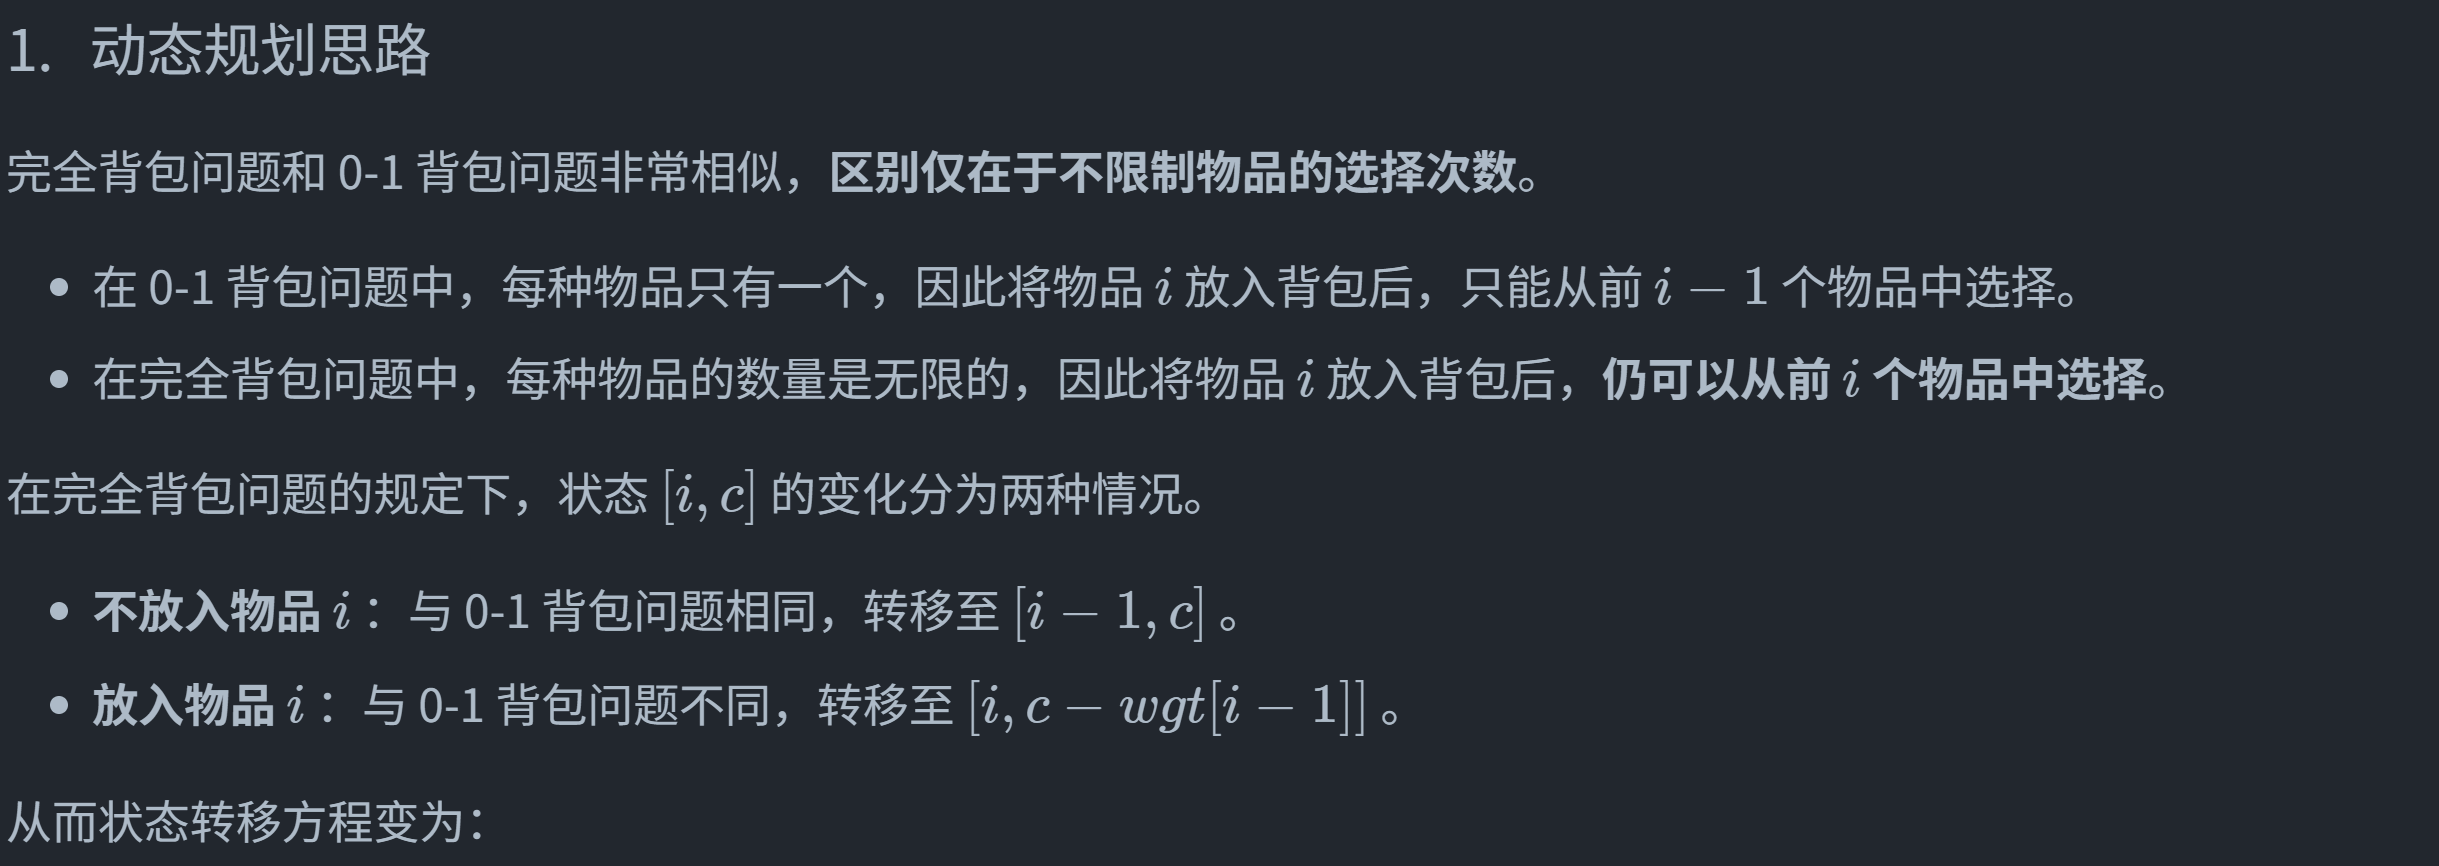
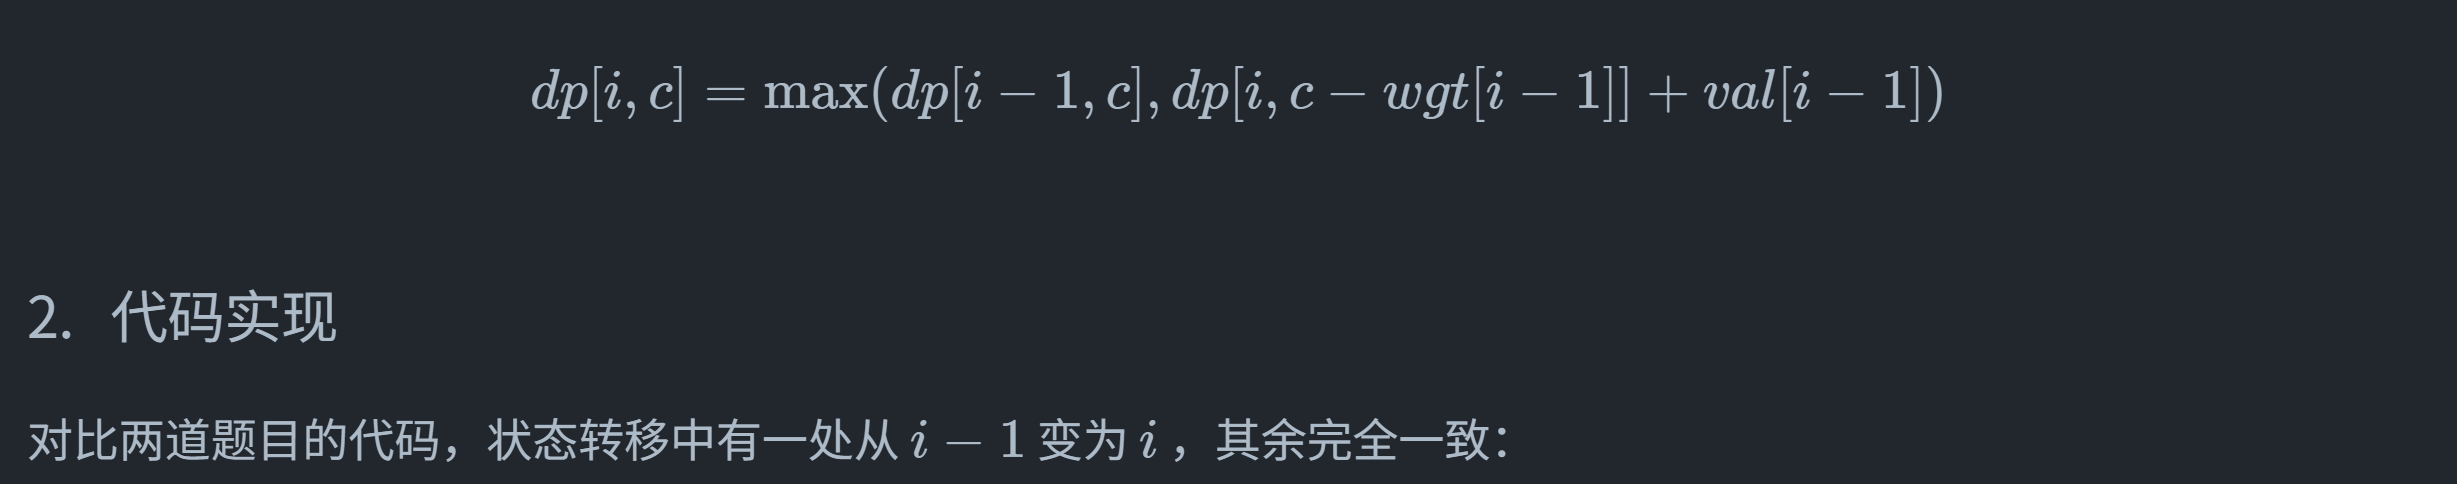

In [1]:
def unbounded_knapsack_dp(wgt: list[int], val: list[int], cap: int) -> int:
    """完全背包：动态规划"""
    n = len(wgt)
    # 初始化 dp 表
    dp = [[0] * (cap + 1) for _ in range(n + 1)]
    # 状态转移
    for i in range(1, n + 1):
        for c in range(1, cap + 1):            
            if wgt[i - 1] > c:
                # 如果当前物品大于背包的剩余容量，则不选择i
                dp[i][c] = dp[i - 1][c]
            else:
                dp[i][c] = max(dp[i - 1][c], dp[i][c - wgt[i - 1]] + val[i - 1])
    return dp[n][cap]                

In [3]:
"""Driver Code"""
if __name__ == "__main__":
    wgt = [1, 2, 3]
    val = [5, 11, 15]
    cap = 4

    # 动态规划
    res = unbounded_knapsack_dp(wgt, val, cap)
    print(f"不超过背包容量的最大物品价值为 {res}")

不超过背包容量的最大物品价值为 22


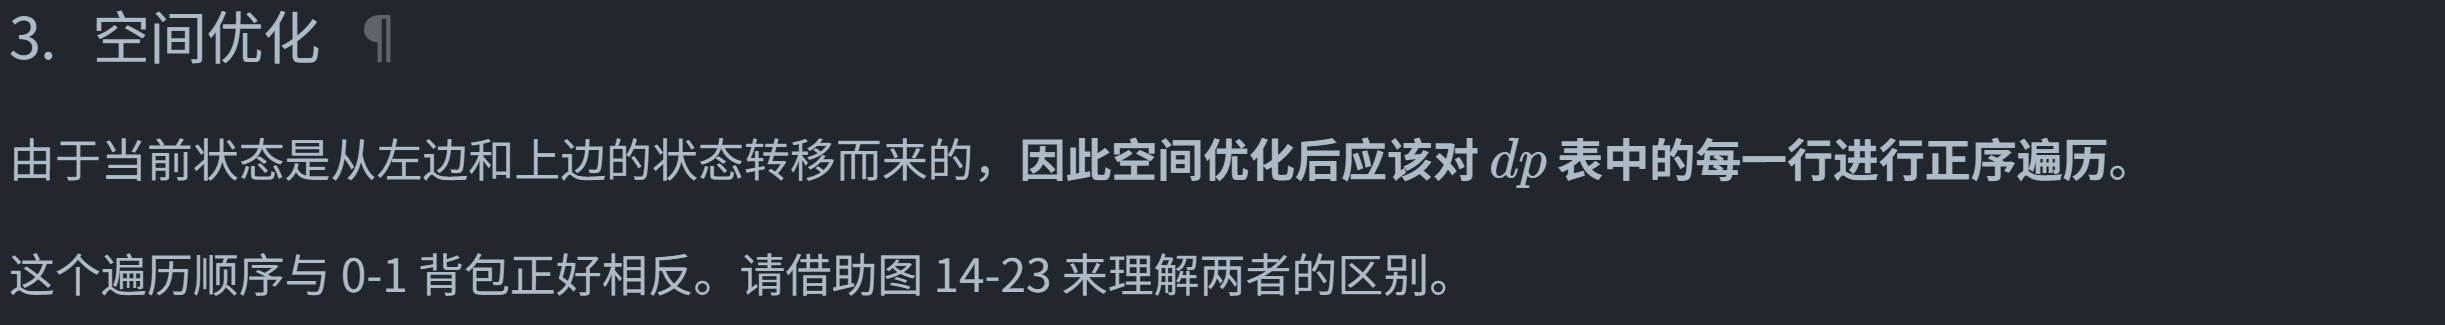
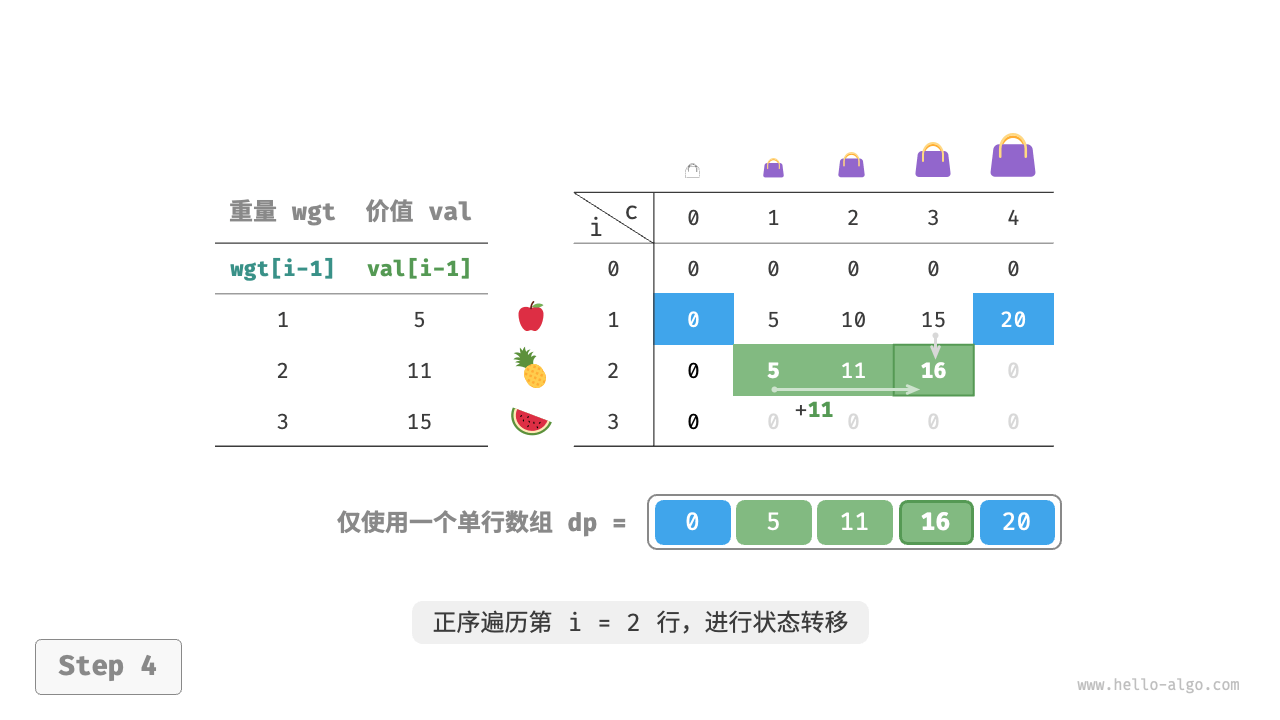
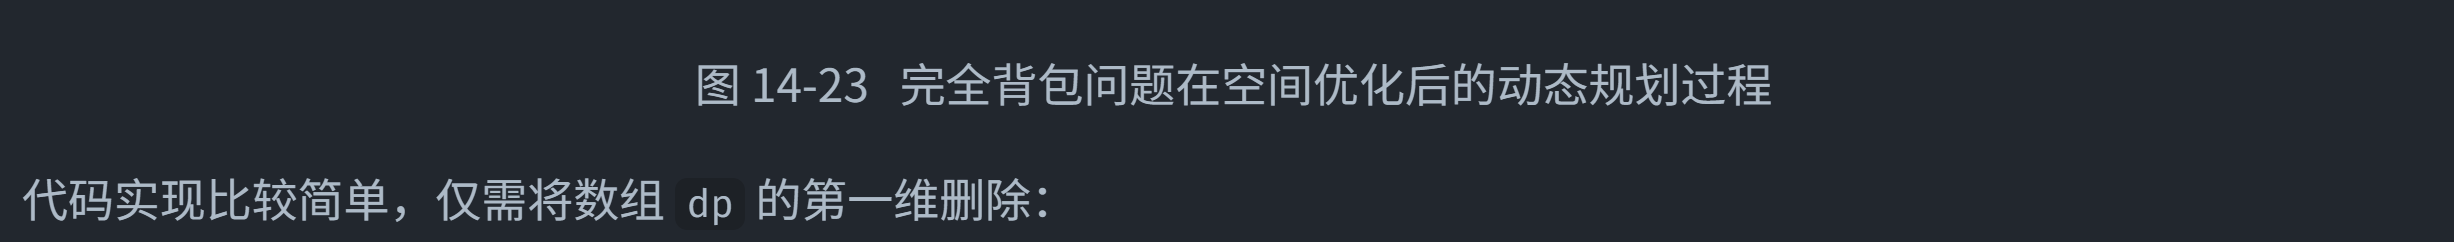

In [4]:
def unbounded_knapsack_dp_comp(wgt: list[int], val: list[int], cap: int) -> int:
    """完全背包：空间优化后的动态规划"""
    n = len(wgt)
    # 初始化 dp 表
    dp = [0] * (cap + 1)
    # 状态转移
    for i in range(1, n + 1):
        # 正序遍历
        for c in range(1, cap + 1):
            if wgt[i - 1] > c:
                # 若超过背包容量，则不选物品 i
                dp[c] = dp[c]
            else:
                # 不选和选物品 i 这两种方案的较大值
                dp[c] = max(dp[c], dp[c - wgt[i - 1]] + val[i - 1])
    return dp[cap]

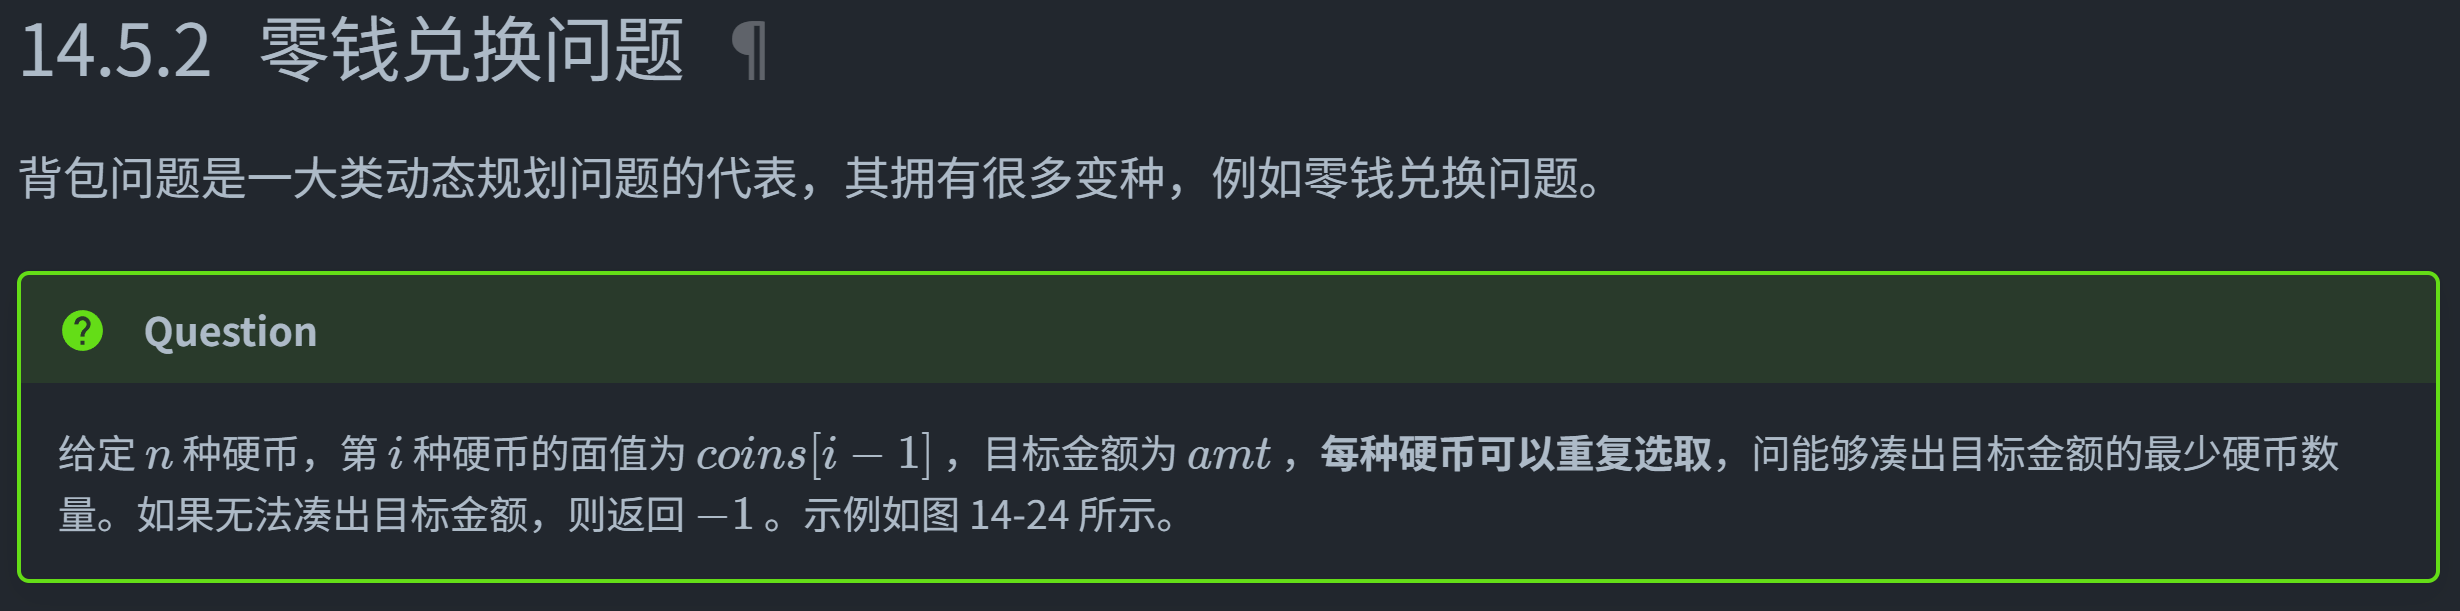
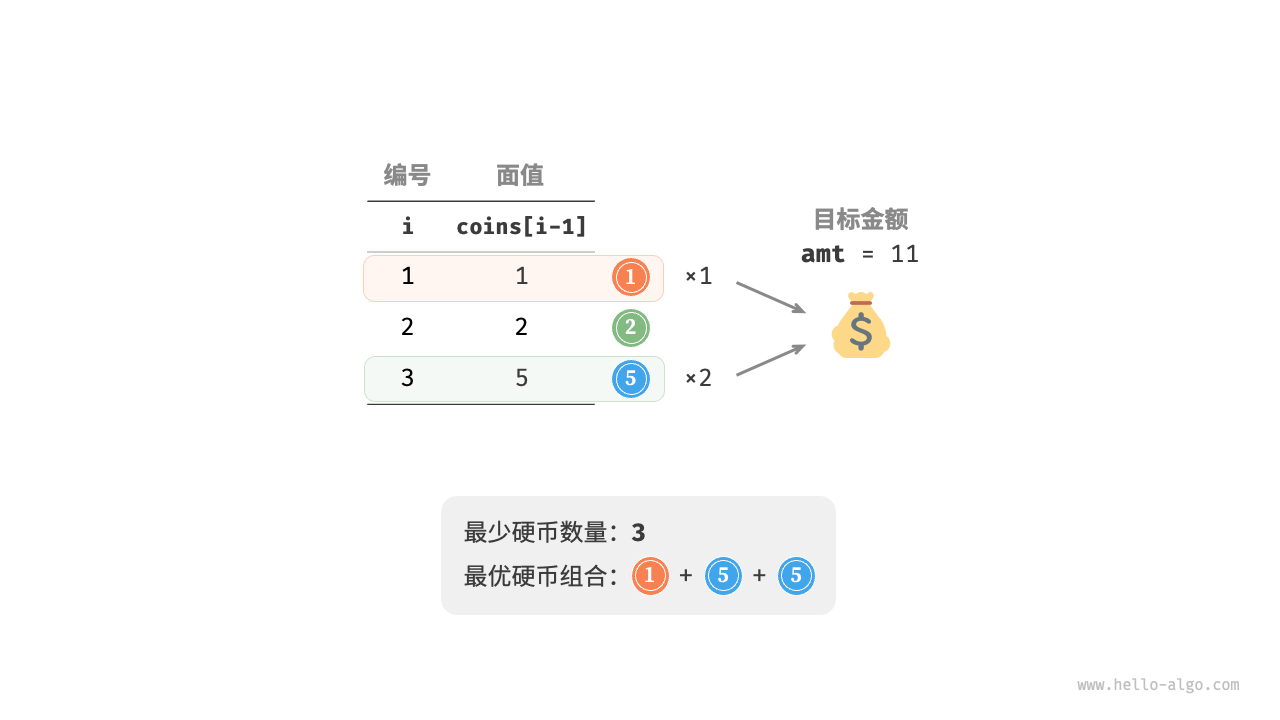
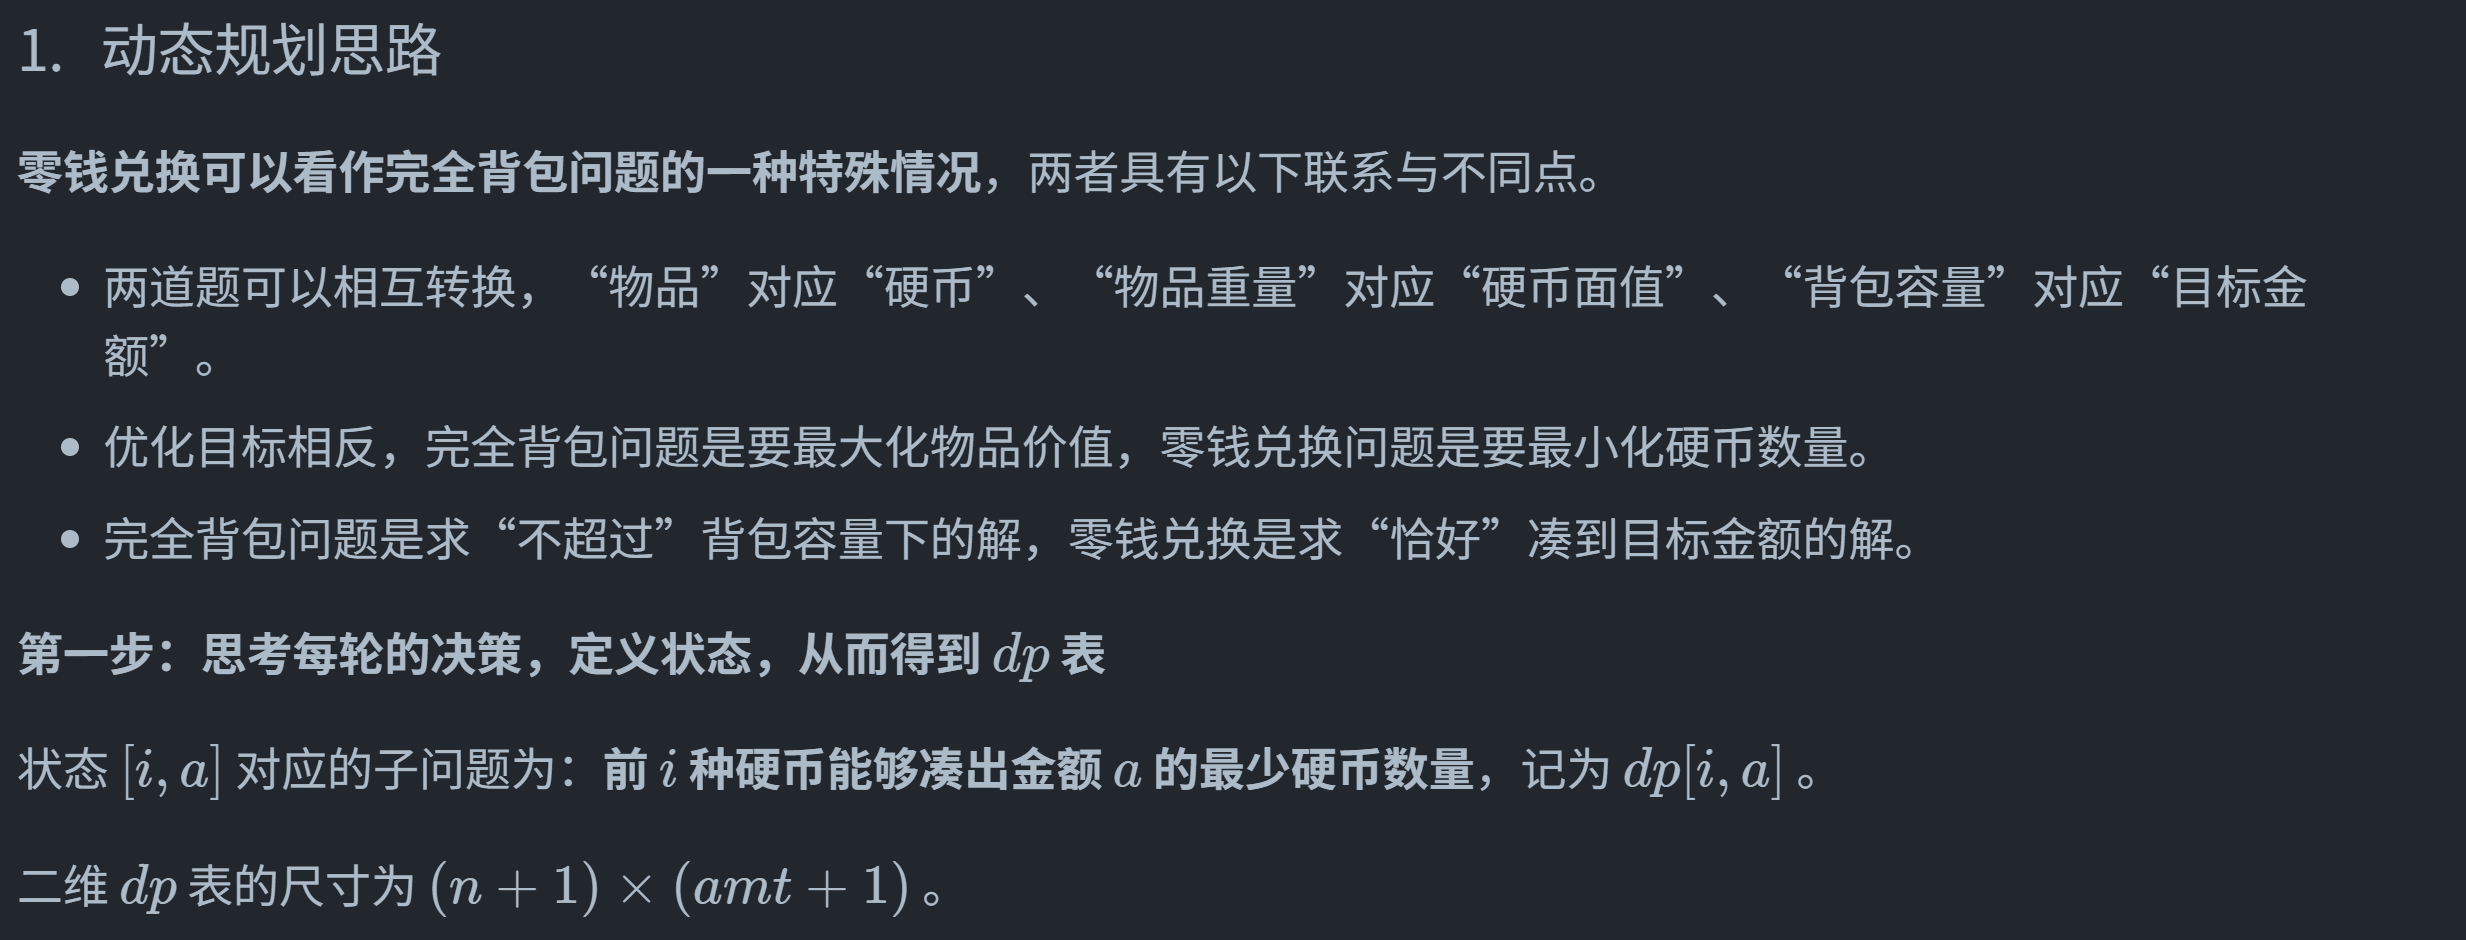
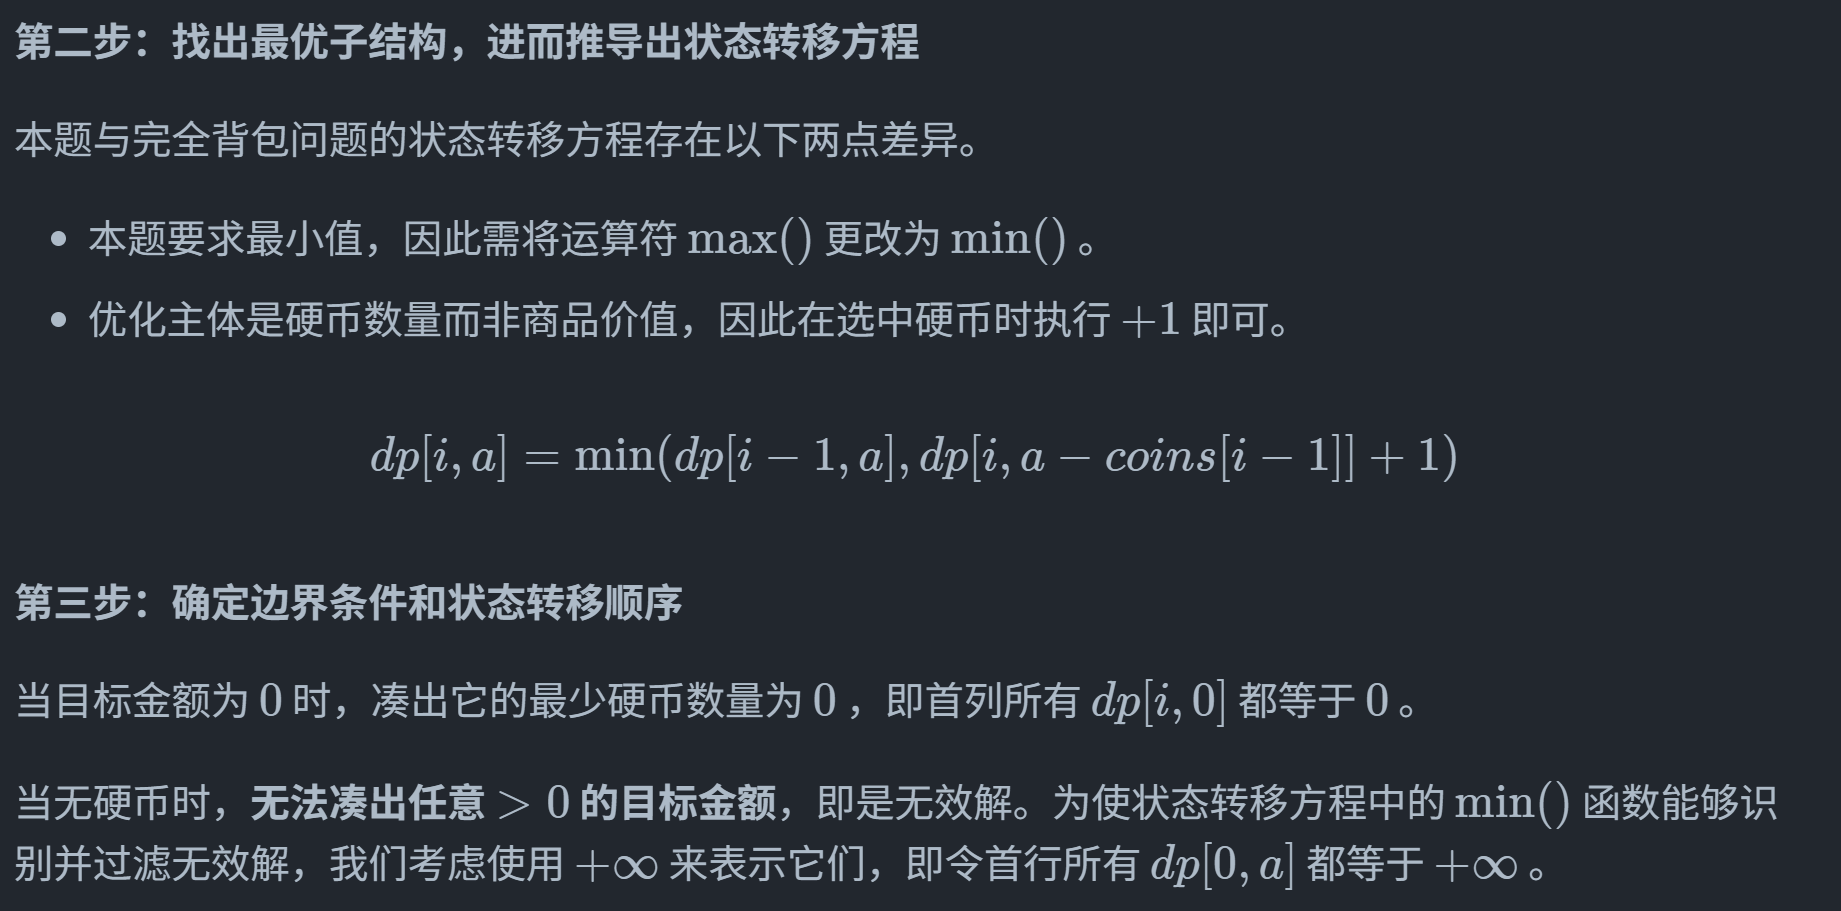
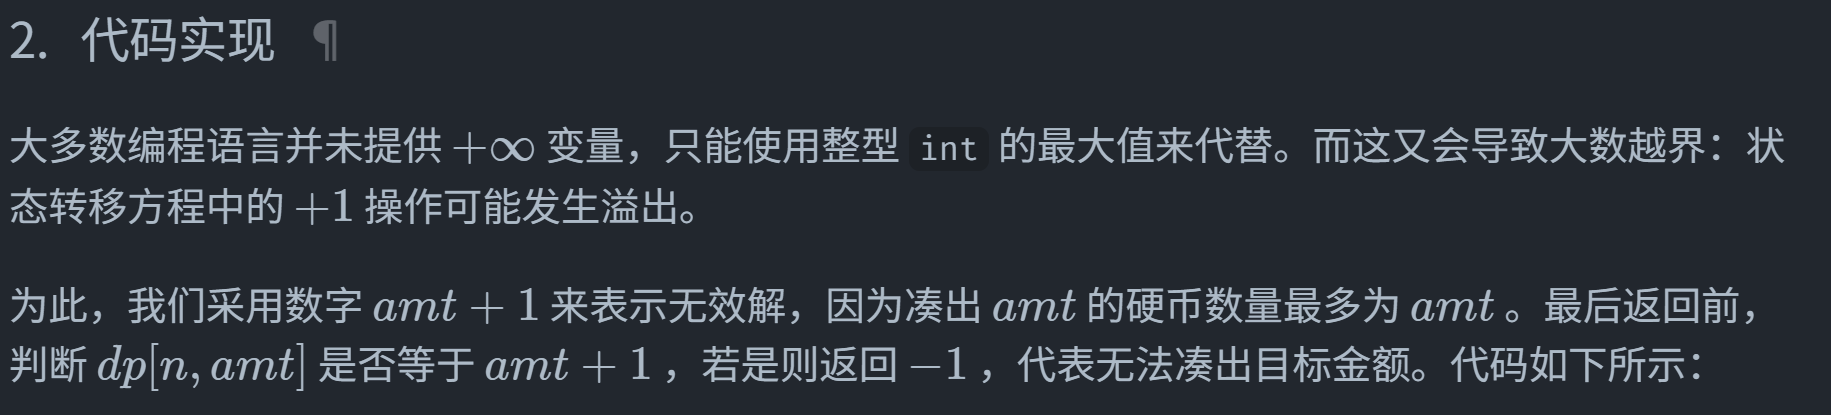

In [5]:
def coin_change_dp(coins: list[int], amt: int) -> int:
    """零钱兑换：动态规划"""
    n = len(coins)
    Max = amt + 1
    dp = [[0] * (amt + 1) for _ in range(n + 1)]
    # 状态转移：首行首列
    for a in range(1, amt + 1):
        dp[0][a] = Max
    # 状态转移：其余行和列
    for i in range(1, n + 1):
        for a in range(1, amt + 1):
            if coins[i - 1] > a:
                # 若超过目标金额，则不选硬币 i
                dp[i][a] = dp[i - 1][a]
            else:
                # 不选和选硬币 i 这两种方案的较小值
                dp[i][a] = min(dp[i - 1][a], dp[i][a-coins[i - 1]] + 1)
    return dp[n][amt] if dp[n][amt] != Max else -1

In [6]:
"""Driver Code"""
if __name__ == "__main__":
    coins = [1, 2, 5]
    amt = 4

    # 动态规划
    res = coin_change_dp(coins, amt)
    print(f"凑到目标金额所需的最少硬币数量为 {res}")

凑到目标金额所需的最少硬币数量为 2


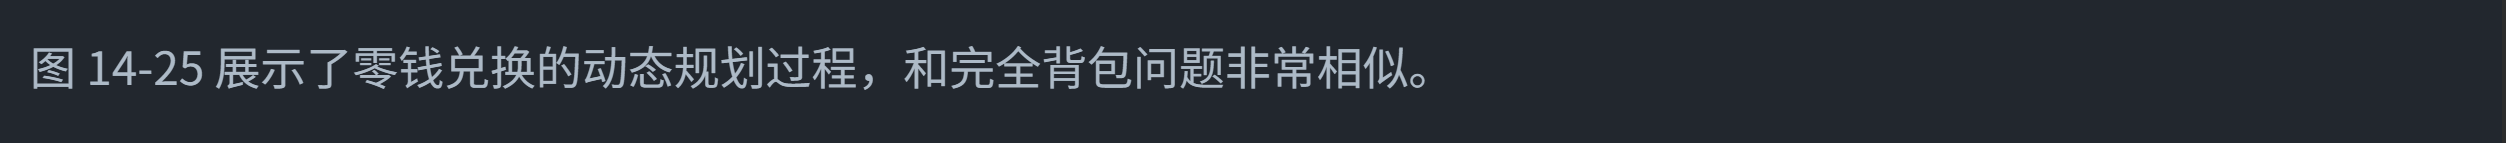
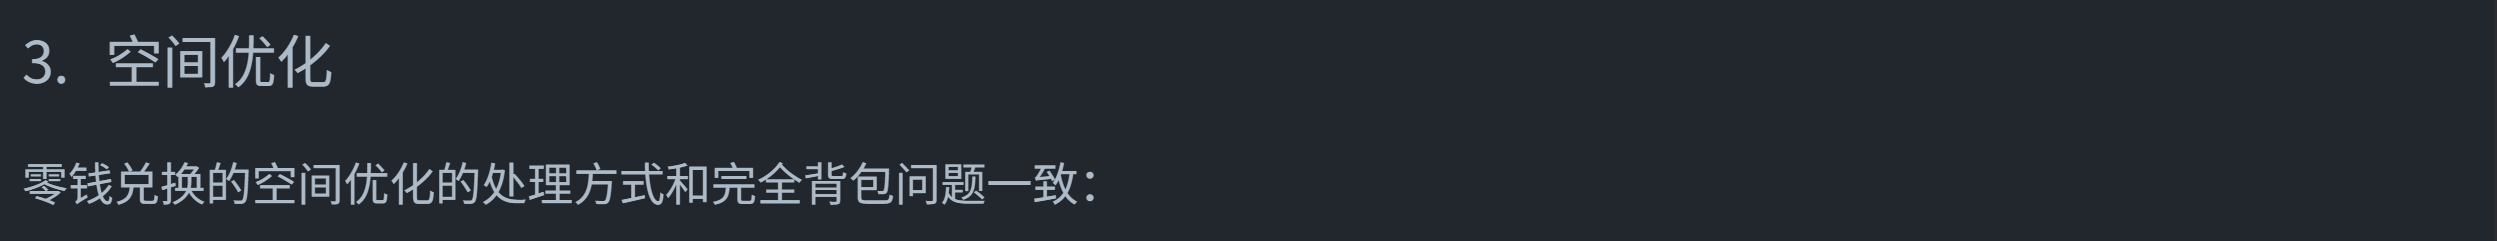

In [7]:
def coin_change_dp_comp(coins: list[int], amt: int) -> int:
    """零钱兑换：空间优化后的动态规划"""
    n = len(coins)
    MAX = amt + 1
    # 初始化 dp 表
    dp = [MAX] * (amt + 1)
    dp[0] = 0
    # 状态转移
    for i in range(1, n + 1):
        # 正序遍历
        for a in range(1, amt + 1):
            if coins[i - 1] > a:
                # 若超过目标金额，则不选硬币 i
                dp[a] = dp[a]
            else:
                # 不选和选硬币 i 这两种方案的较小值
                dp[a] = min(dp[a], dp[a - coins[i - 1]] + 1)
    return dp[amt] if dp[amt] != MAX else -1

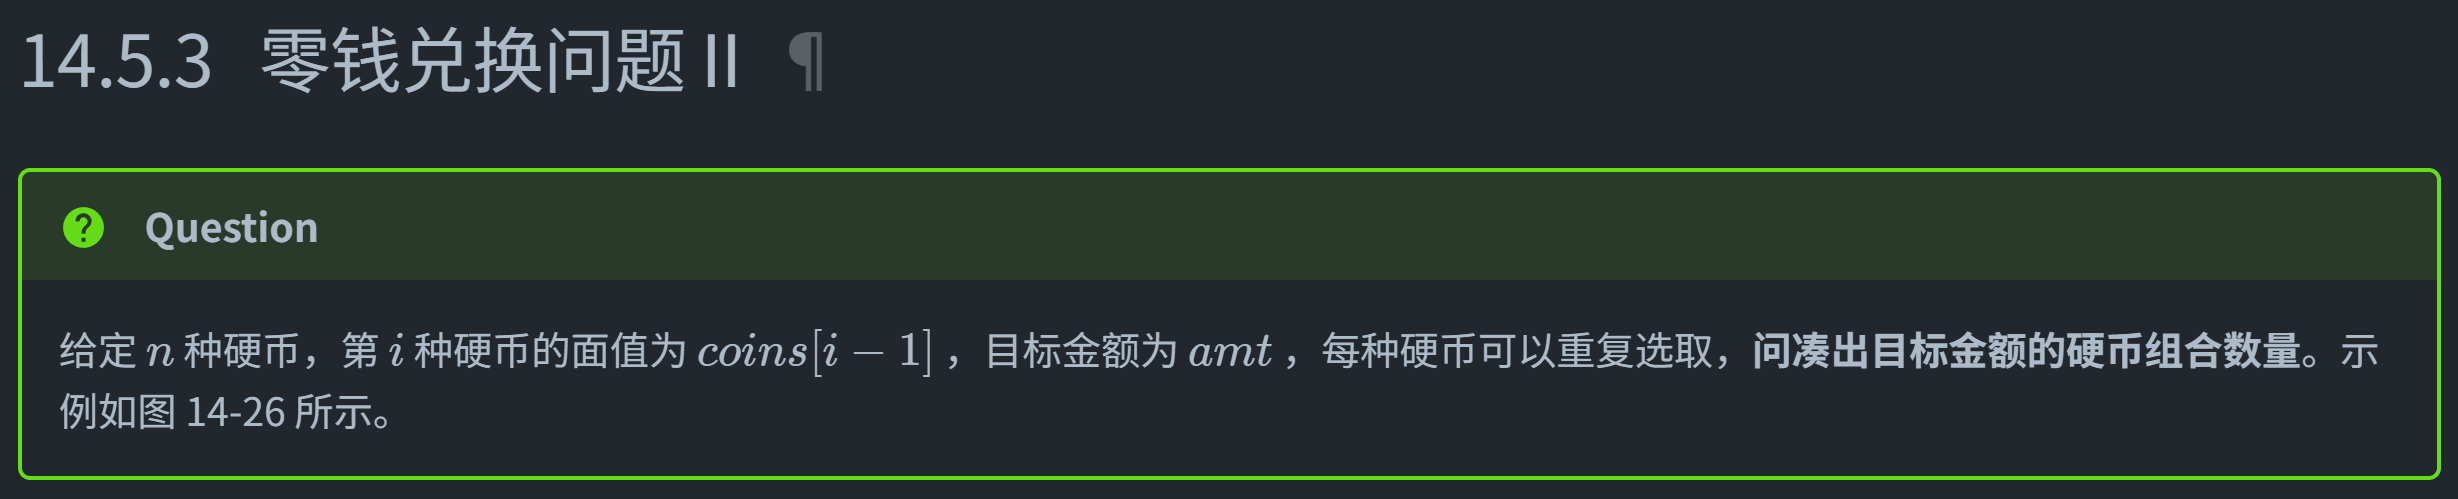](attachment:image.png)
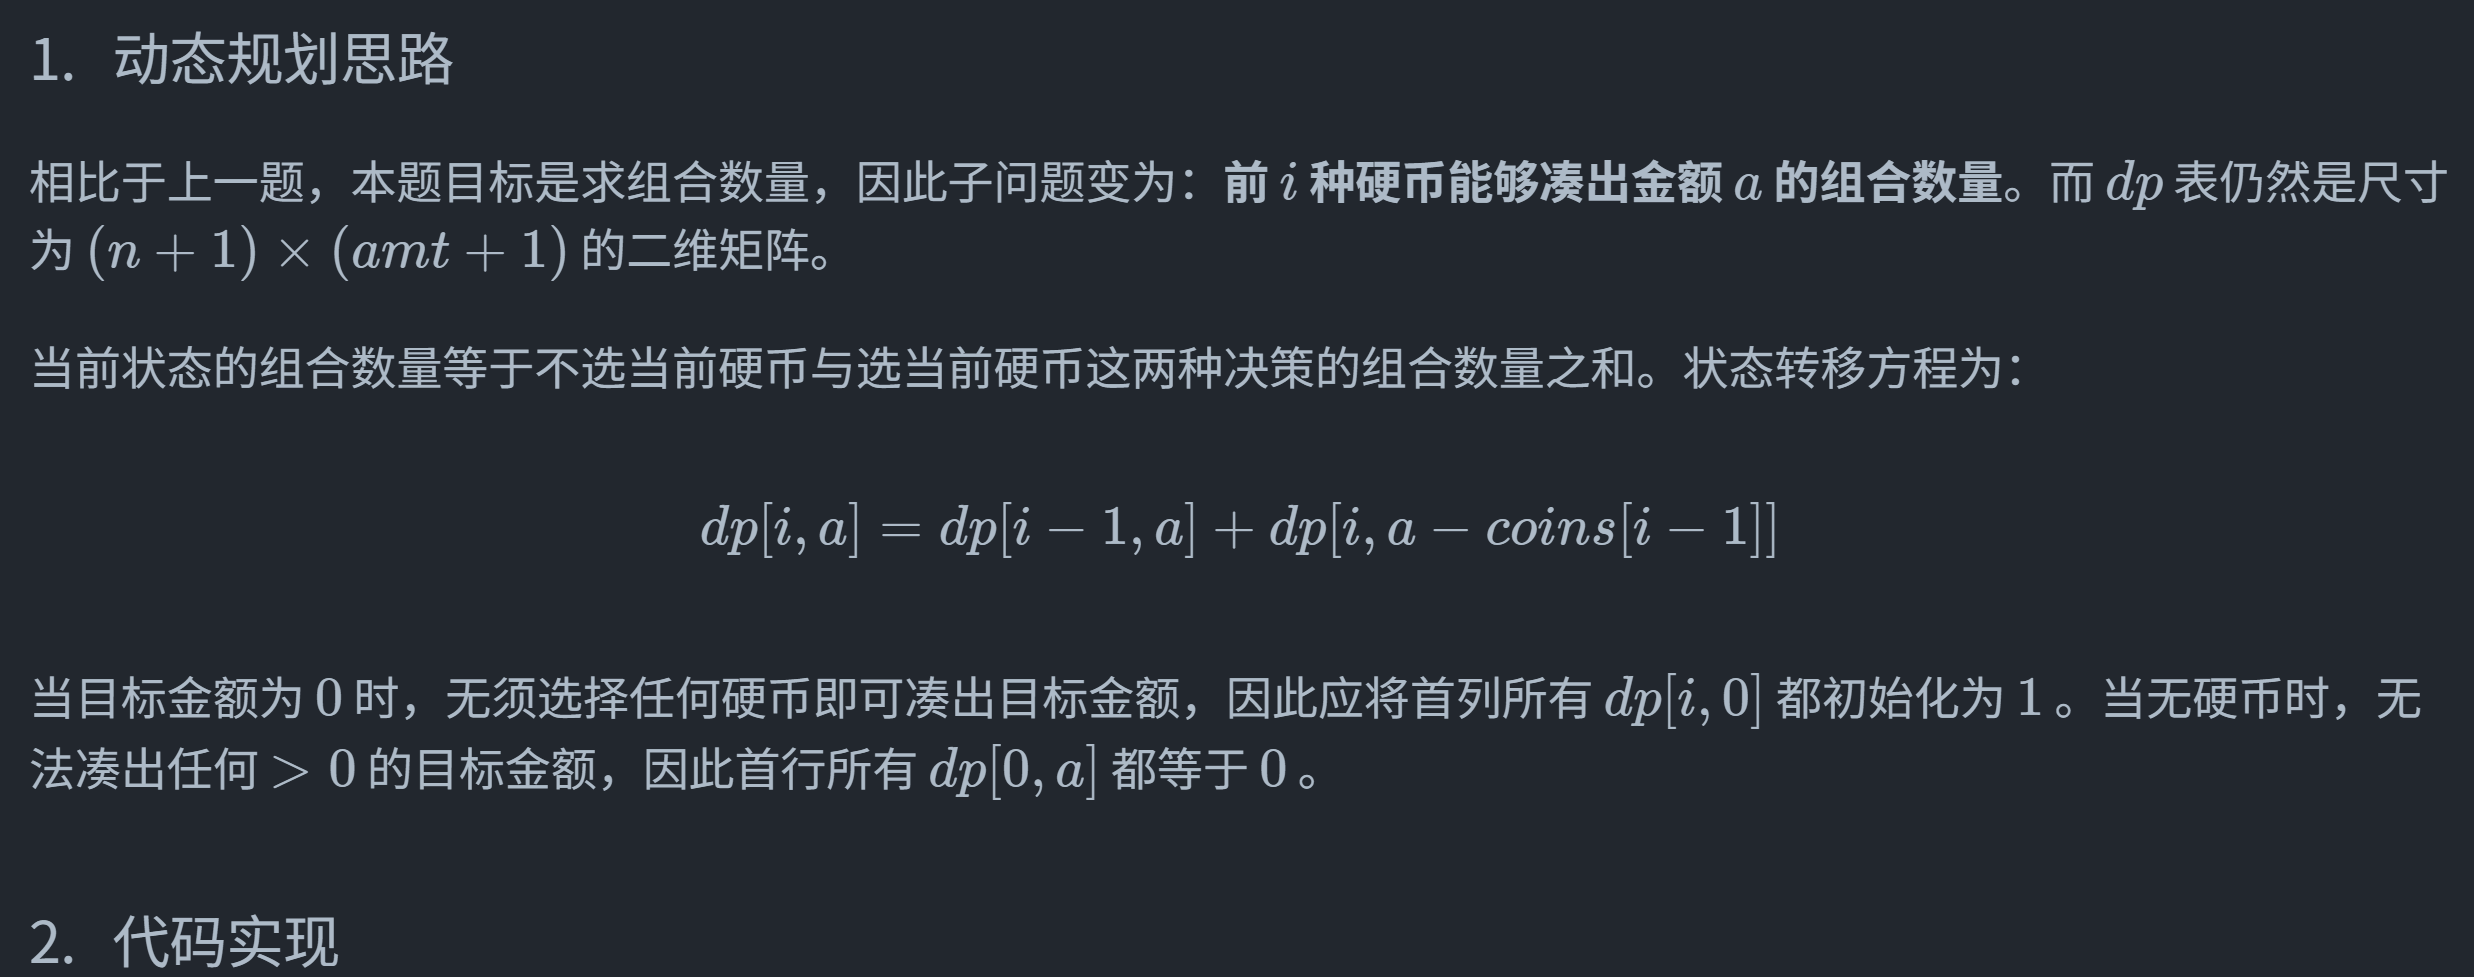

In [8]:
def coin_change_ii_dp(coins: list[int], amt: int) -> int:
    """零钱兑换 II：动态规划"""
    n = len(coins)
    # 初始化 dp 表
    dp = [[0] * (amt + 1) for _ in range(n + 1)]
    # 初始化首列
    for i in range(n + 1):
        dp[i][0] = 1
    # 状态转移
    for i in range(1, n + 1):
        for a in range(1, amt + 1):
            if coins[i - 1] > a:
                # 若超过目标金额，则不选硬币 i
                dp[i][a] = dp[i - 1][a]
            else:
                # 不选和选硬币 i 这两种方案之和
                dp[i][a] = dp[i - 1][a] + dp[i][a - coins[i - 1]]
    return dp[n][amt]

In [9]:
"""Driver Code"""
if __name__ == "__main__":
    coins = [1, 2, 5]
    amt = 5

    # 动态规划
    res = coin_change_ii_dp(coins, amt)
    print(f"凑出目标金额的硬币组合数量为 {res}")

凑出目标金额的硬币组合数量为 4


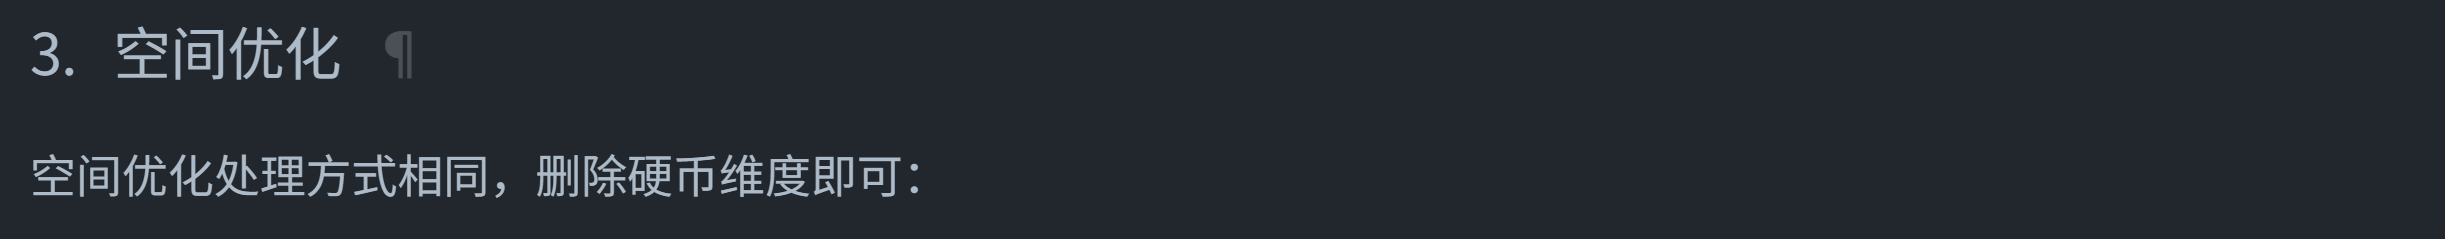

In [10]:
def coin_change_ii_dp_comp(coins: list[int], amt: int) -> int:
    """零钱兑换 II：空间优化后的动态规划"""
    n = len(coins)
    # 初始化 dp 表
    dp = [0] * (amt + 1)
    dp[0] = 1
    # 状态转移
    for i in range(1, n + 1):
        # 正序遍历
        for a in range(1, amt + 1):
            if coins[i - 1] > a:
                # 若超过目标金额，则不选硬币 i
                dp[a] = dp[a]
            else:
                # 不选和选硬币 i 这两种方案之和
                dp[a] = dp[a] + dp[a - coins[i - 1]]
    return dp[amt]